In [22]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("./data/sample_26000_full_cleansed_anonymized.csv")
df

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code
0,1534262899,c7f3d022e57d46ec78d1626a016ecb9281fbe2b2,PC,Other$Other,4523dfed2d55afbd76286861e0b764e08d4695f7,Windows,10,Firefox,DE-BY-POS,92353
1,1534265100,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,313f8be041b0a4b47127bdc099ffcb9fbe40aca9,Windows,7,Chrome,DE-ST-MAG,39126
2,1534265100,7ea941558d60dd9025cf9ff65cc4b07a1e586f21,ConnectedTV,Samsung$Other,8169f04e199ced559079f5612b2bd91304bc3e73,Other,Other,Other,DE-NW-GEB,58285
3,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
4,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
...,...,...,...,...,...,...,...,...,...,...
26259,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26260,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26261,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26262,1534265999,75e01f11cd4650d8e2221663b18260451e4de6ef,Phone,Samsung$Galaxy,08269cdd472d182bee91485bb998f1618080c9f5,Android,4,Chrome,DE-BE-BER,14193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26264 entries, 0 to 26263
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   event_time    26264 non-null  int64 
 1   user_uuid     26264 non-null  object
 2   devicegroup   26264 non-null  object
 3   device        26264 non-null  object
 4   ip_address    26264 non-null  object
 5   os_family     26264 non-null  object
 6   os_name       26264 non-null  object
 7   browser_name  26264 non-null  object
 8   locode        26264 non-null  object
 9   postal_code   25136 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


In [4]:
df.describe()

,event_time
count,2.626400e+04
mean,1.534265e+09
std,4.719512e+02
min,1.534263e+09
25%,1.534265e+09
50%,1.534265e+09
75%,1.534266e+09
max,1.534266e+09


# Duplicates check

In [5]:
df = df.drop_duplicates(keep='first')

# Missing data check

In [32]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in df.columns:
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_df = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_df

,N_Missing [-],Percentage [%]
event_time,0,0.0
user_uuid,0,0.0
devicegroup,0,0.0
device,0,0.0
ip_address,0,0.0
os_family,0,0.0
os_name,0,0.0
browser_name,0,0.0
locode,0,0.0
postal_code,0,0.0


# Drop the 5% of rows with missing Postal Code

In [31]:
df = df.dropna(how='any')

#### Rows with missing postal code

In [33]:
missing_code = df[df.postal_code.isnull()]
missing_code

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code


# Inspect the columns

#### Event Time

<AxesSubplot: xlabel='event_time', ylabel='Count'>

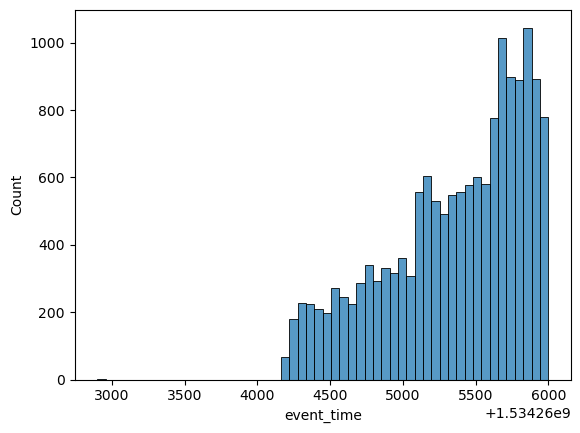

In [8]:
sns.histplot(df.event_time)

#### User UU ID

In [9]:
df.user_uuid.value_counts()

b602d594afd2b0b327e07a06f36ca6a7e42546d0    3828
ea48b29e05da74493d397da3ac7533708e8790fd     108
174040068c20ff3e16f0f6a16dd36371f2a87d1d      22
5aedcb83537404da8cf8997bfcdbf1ab789606c1       7
dbe532627eefa16fc7b487615f4555537bc5058b       6
                                            ... 
978504394d3f5bb3b8cd1f3ec13476bd1854d506       1
951281f1aeef4b9188439f7f5dcbc56976a5870f       1
282d336b0bdcbb7e7bde119fa531af3eace39c98       1
cedc342956326c76f53089f1739f516f429617e4       1
2c46e42d1679d27e8bac310f0e82f51f4d68deb0       1
Name: user_uuid, Length: 11110, dtype: int64

#### Device group

In [10]:
df.devicegroup.value_counts()

PC                 5353
ConnectedTV        4723
Phone              4350
Tablet              938
ConnectedDevice      38
SetTopBox            20
Name: devicegroup, dtype: int64

#### Device

In [11]:
df.device.value_counts()

Other$Other         5938
Samsung$Other       3521
Apple$iPhone        1310
Apple$iPad           889
Apple$Other          814
Panasonic$Other      740
LG$Other             558
Sony$Other           492
Philips$Other        286
Telefunken$Other     142
Huawei$Other         133
Samsung$Galaxy        82
Technisat$Other       68
Loewe$Other           59
Aldi$Other            56
Motorola$Moto         50
Toshiba$Other         47
HTC$Other             46
Amazon$Kindle         37
Hisense$Other         36
Lenovo$Other          35
ZTE$Other             20
Microsoft$Xbox        17
Other$Nexus            9
Microsoft$Lumia        6
JVC$Other              5
Vodafone$Other         5
RIM$Other              5
Nokia$Other            3
Asus$Other             3
Kendo$Other            3
Sony$PlayStation       2
Nokia$Lumia            2
HP$Other               1
Apple$iPod             1
Nintendo$Wii           1
Name: device, dtype: int64

#### IP Address

In [12]:
df.ip_address.value_counts()

bf96134a2a35c14daf084af58efebb0f09854ebb    15
e897fcc02df496db4a033ce1b792d631dc9f9ef7    11
4ec89b1190cda1c4088f6ccd8aaadd5aa287b7f7     8
7a70ac711609e52ab12f64ce03a877a8d2e4b947     7
b174258bb37b69c7fb427195b3f8c9dd9255af27     7
                                            ..
36cba4346c2a73cb6044a0cae8c143479e22e5f2     1
5c1a44c720e36d98faaca69295eaac49a3681815     1
c8350f1dfe7ce4a8409e259efd4e12dfd5a501db     1
0aaa015972f4d4d0eace76e8fbf5ec1cd135cbaa     1
92dc8cc1cc07e831af0734eba1af6150968410d3     1
Name: ip_address, Length: 14468, dtype: int64

#### OS Family

In [13]:
df.os_family.value_counts()

Windows     4379
Android     3105
Other       2810
iOS         2205
Linux       1898
macOS        809
WebOS        210
ChromeOs       6
Name: os_family, dtype: int64

#### OS name

In [14]:
df.os_name.value_counts()

Other        5215
10           2853
7            2208
11           1720
8            1535
10.13         467
5             436
6             409
4             157
10.11         129
9             103
10.12         103
10.10          63
12              9
10 Mobile       5
Phone 8         5
10.14           5
Name: os_name, dtype: int64

#### Browser name

In [15]:
df.browser_name.value_counts()

Chrome     4891
Other      3411
Safari     2678
Firefox    2229
Opera      1368
Edge        510
MSIE        320
Vivaldi      15
Name: browser_name, dtype: int64

#### Locode

In [16]:
df.locode.value_counts()

DE-BE-BER    857
DE-HH-HAM    681
DE-BY-MUC    478
DE--         378
DE-NW-CGN    378
            ... 
DE-NI-DRP      1
DE-MV-LZI      1
EG-ALX-        1
DE-ST-BAT      1
DK-82-LVG      1
Name: locode, Length: 2622, dtype: int64

#### Postal code

In [27]:
df.postal_code.value_counts()

12529    309
20095    284
70173    148
80796     97
50676     82
        ... 
36115      1
45879      1
32479      1
6845       1
7620       1
Name: postal_code, Length: 3969, dtype: int64

# The same devices search
Two devices are considered "in the same household" if their user_uuid are different (two separate devices) but their ip address 
overlap at some point (both devices used behind same router).

In [18]:
grp = df.groupby('ip_address')

#### The same household devices

In [19]:
grp.size().sort_values(ascending=False)

ip_address
bf96134a2a35c14daf084af58efebb0f09854ebb    15
e897fcc02df496db4a033ce1b792d631dc9f9ef7    11
4ec89b1190cda1c4088f6ccd8aaadd5aa287b7f7     8
7a70ac711609e52ab12f64ce03a877a8d2e4b947     7
b174258bb37b69c7fb427195b3f8c9dd9255af27     7
                                            ..
57c891c4f566e4776c03f56fe45e9436d5386940     1
57c8dfc73eefc96484750ae6532ccbaefb731bd5     1
57c9824a21e20830fa1430063cc2aabe8e698bb2     1
57cae7e901ced798bf53b3f348c46fcae377c317     1
ffeaaf7e3615453ff3dc3751f4086ec866544888     1
Length: 14468, dtype: int64

In [21]:
#df[df.ip_address.duplicated()]